In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [2]:
%matplotlib inline

In [3]:
appl_train_raw = pd.read_csv('home-credit-default-risk/application_train.csv')

In [4]:
pd.options.display.max_columns = None

In [6]:
correlation_matrix_raw = appl_train_raw.corr()

In [7]:
sns.mpl.rc('figure', figsize=(20,20))

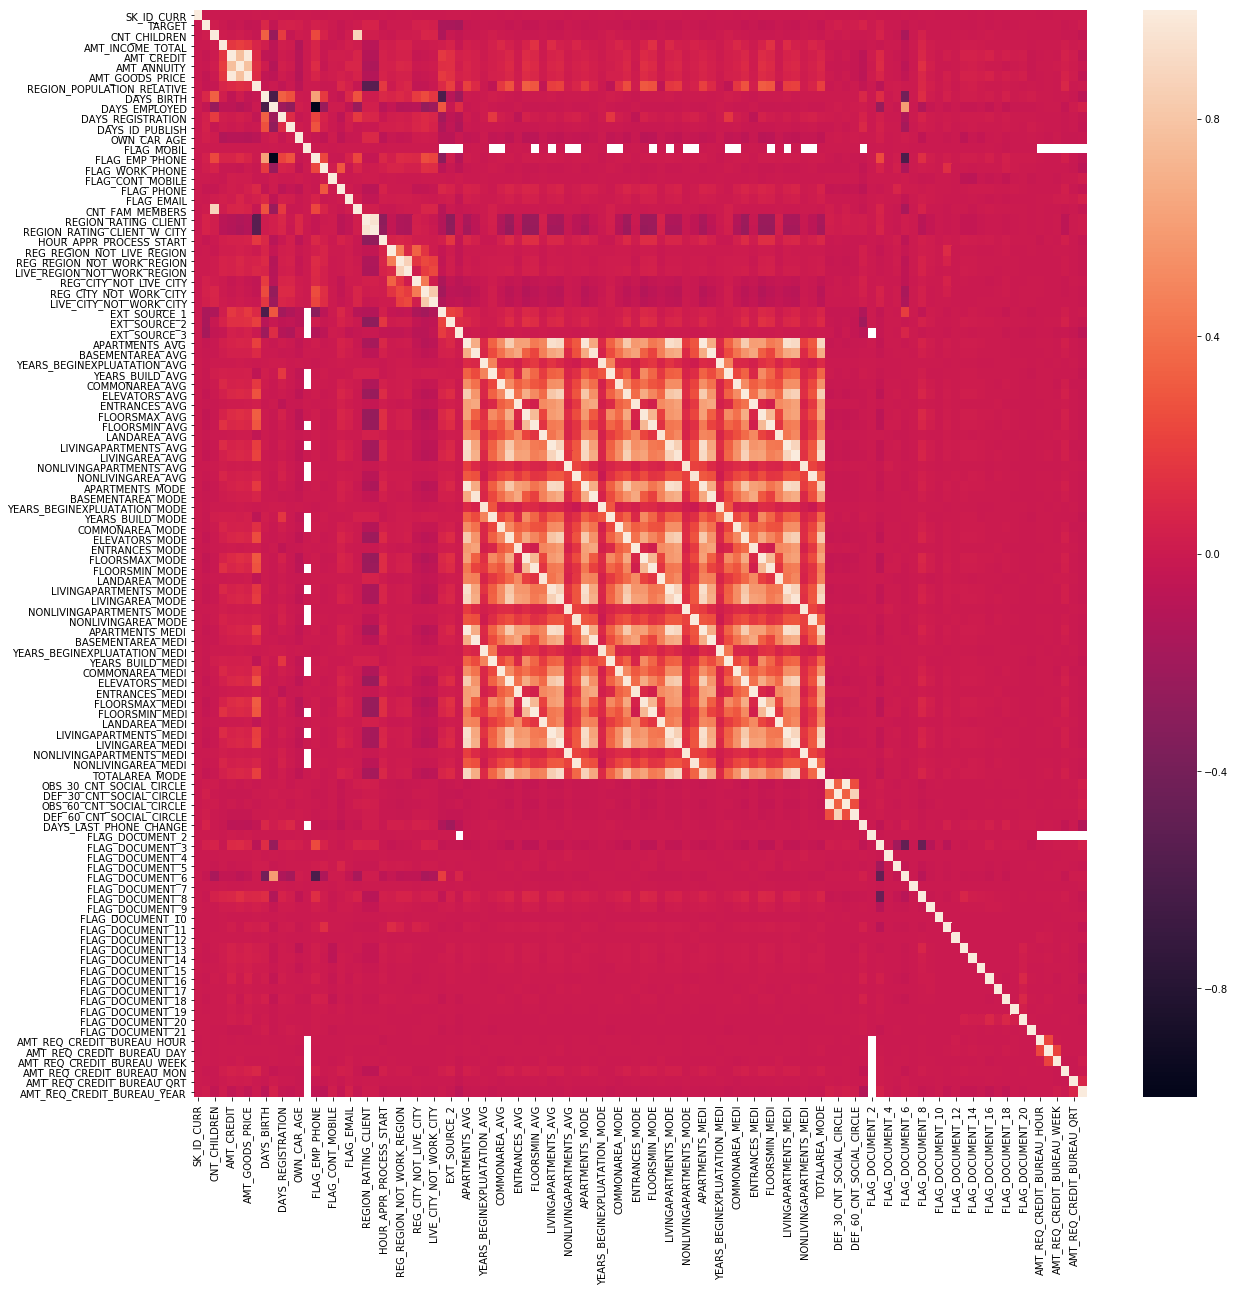

In [8]:
sns.heatmap(correlation_matrix_raw)

In [9]:
appl_train_raw.shape

(307511, 122)

In [10]:
appl_raw_test = pd.read_csv('home-credit-default-risk/application_test.csv')

In [11]:
appl_raw_test.shape

(48744, 121)

In [52]:
appl_raw_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [59]:
appl_small_train = appl_train_raw[['EXT_SOURCE_2', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'DAYS_BIRTH','DAYS_EMPLOYED', 
                                   'AMT_ANNUITY', 'DAYS_ID_PUBLISH','TARGET']]

In [60]:
appl_train = pd.get_dummies(appl_small_train)

In [61]:
appl_train.shape

(307511, 8)

In [62]:
appl_train.head()

,EXT_SOURCE_2,EXT_SOURCE_1,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,AMT_ANNUITY,DAYS_ID_PUBLISH,TARGET
0,0.262949,0.083037,0.139376,-9461,-637,24700.5,-2120,1
1,0.622246,0.311267,NaN,-16765,-1188,35698.5,-291,0
2,0.555912,NaN,0.729567,-19046,-225,6750.0,-2531,0
3,0.650442,NaN,NaN,-19005,-3039,29686.5,-2437,0
4,0.322738,NaN,NaN,-19932,-3038,21865.5,-3458,0


In [64]:
appl_test_raw = pd.read_csv('home-credit-default-risk/application_test.csv')
appl_small_test = appl_test_raw[['EXT_SOURCE_2', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'DAYS_BIRTH','DAYS_EMPLOYED', 
                                   'AMT_ANNUITY', 'DAYS_ID_PUBLISH']]
appl_test = pd.get_dummies(appl_small_test)
appl_test.head()

,EXT_SOURCE_2,EXT_SOURCE_1,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,AMT_ANNUITY,DAYS_ID_PUBLISH
0,0.789654,0.752614,0.159520,-19241,-2329,20560.5,-812
1,0.291656,0.564990,0.432962,-18064,-4469,17370.0,-1623
2,0.699787,NaN,0.610991,-20038,-4458,69777.0,-3503
3,0.509677,0.525734,0.612704,-13976,-1866,49018.5,-4208
4,0.425687,0.202145,NaN,-13040,-2191,32067.0,-4262


In [22]:
appl_test.shape

(48744, 242)

In [24]:
train_labels = appl_train['TARGET']

In [25]:
appl_train, appl_test = appl_train.align(appl_test, join = 'inner', axis = 1)

In [26]:
appl_train['TARGET'] = train_labels

In [28]:
print('Training Features shape: ', appl_train.shape)
print('Testing Features shape: ', appl_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 242)


In [32]:
(appl_train['DAYS_EMPLOYED']).describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

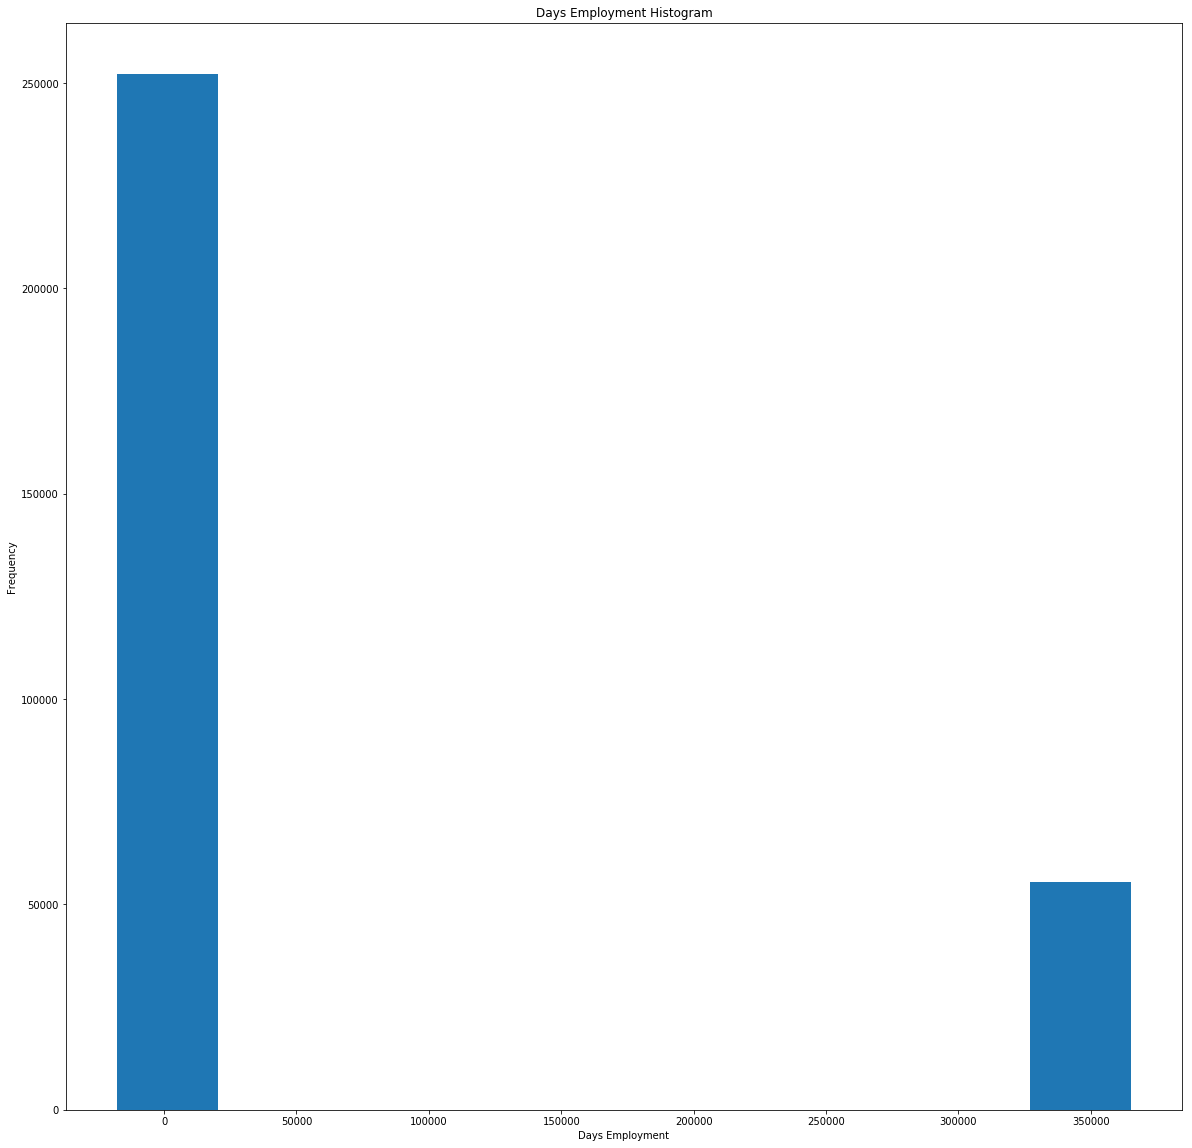

In [33]:
appl_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [37]:
anom = appl_train[appl_train['DAYS_EMPLOYED'] == 365243]
non_anom = appl_train[appl_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


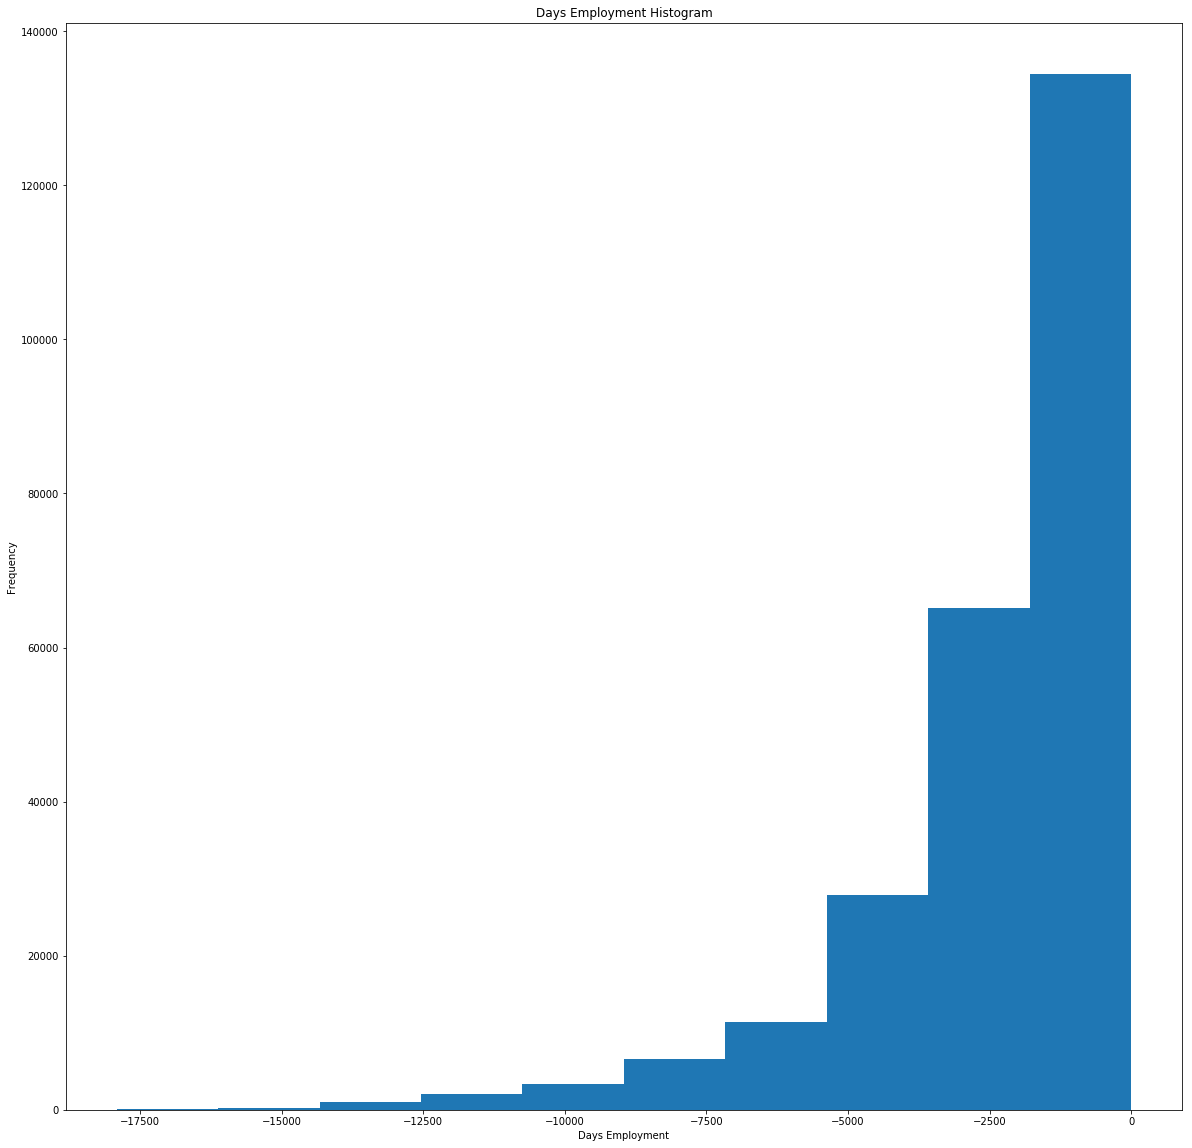

In [38]:
# Create an anomalous flag column
appl_train['DAYS_EMPLOYED_ANOM'] = appl_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
appl_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

appl_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [39]:
appl_test['DAYS_EMPLOYED_ANOM'] = appl_test["DAYS_EMPLOYED"] == 365243
appl_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (appl_test["DAYS_EMPLOYED_ANOM"].sum(), len(appl_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [40]:
correlations = appl_train.corr()['TARGET'].sort_values()

In [41]:
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [44]:
appl_train['DAYS_BIRTH'] = abs(appl_train['DAYS_BIRTH'])
appl_train['DAYS_BIRTH'].corr(appl_train['TARGET'])

-0.07823930830982694

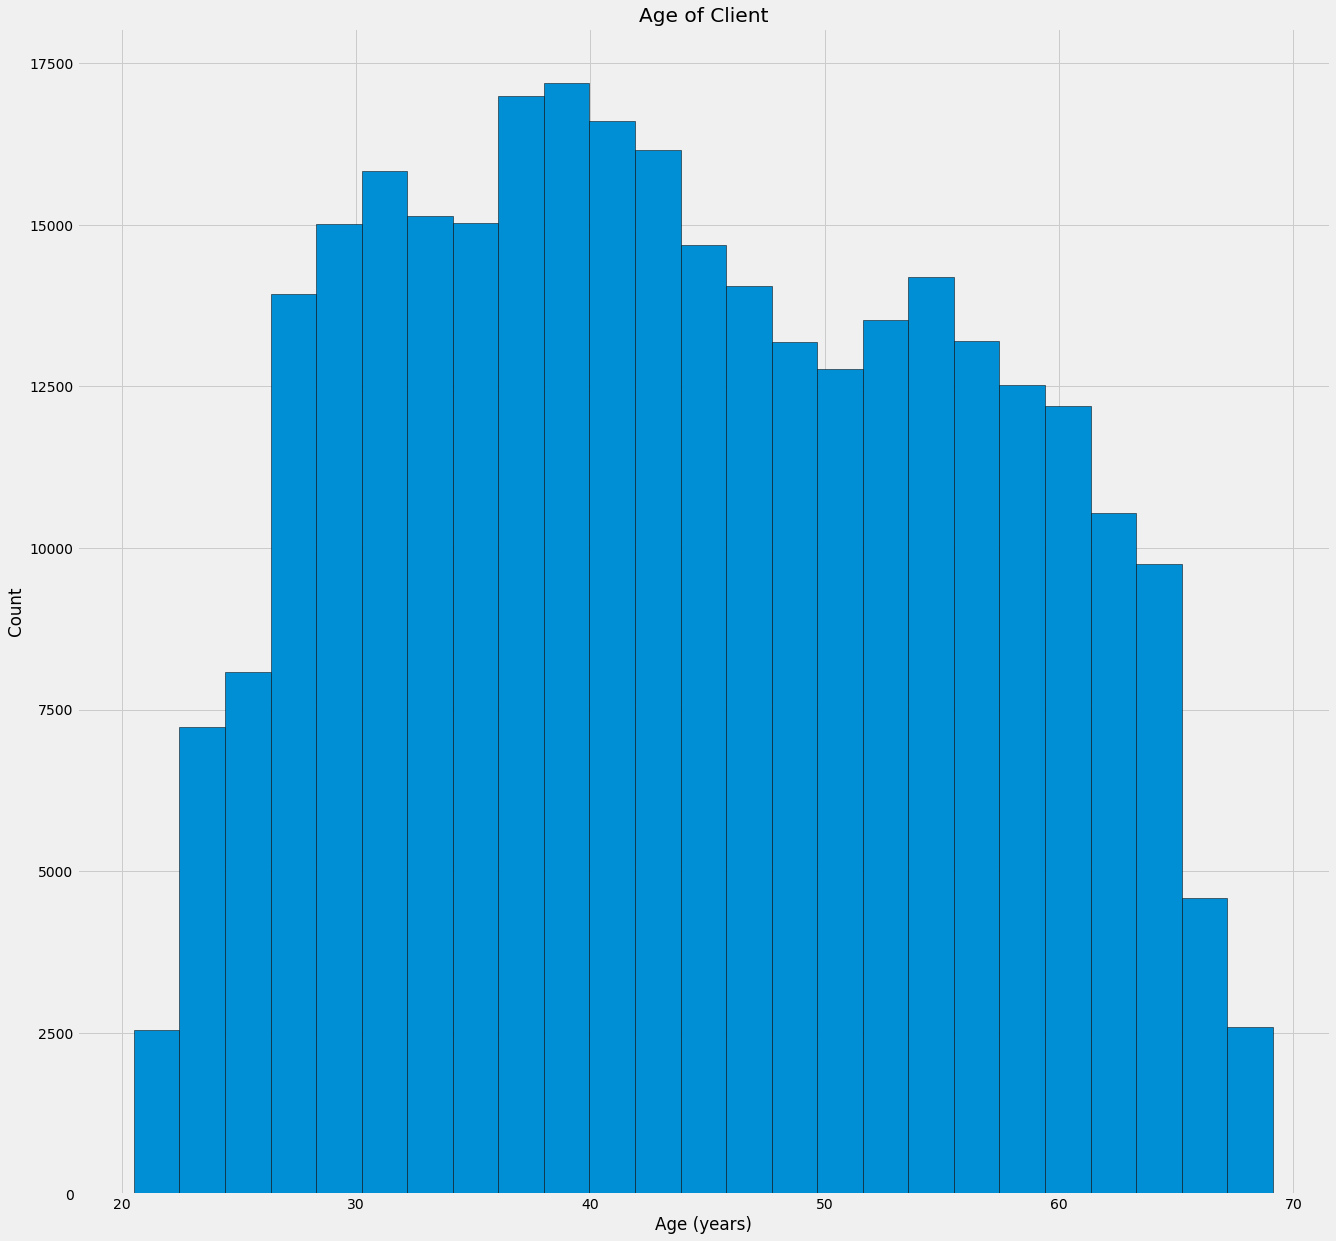

In [46]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(appl_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

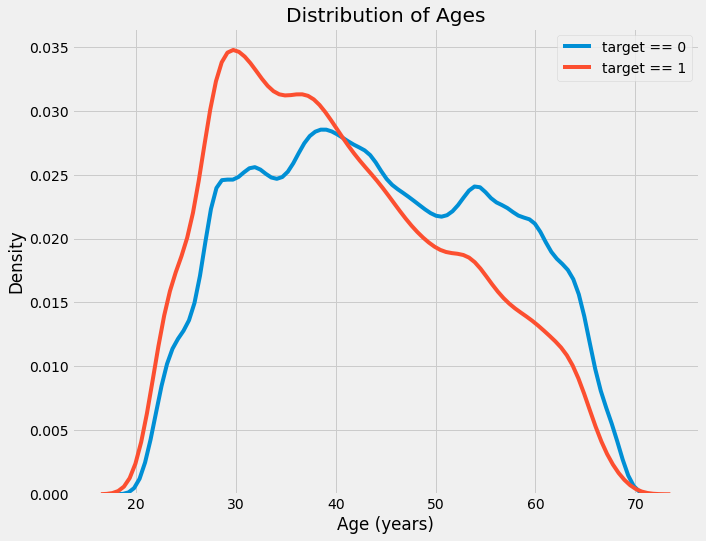

In [47]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');